# Data Exploration and Cleaning:
    -  Univariable study of target and features (Continuous & Categorical features, separately)
    -  Multivariate study of target and features
    -  Testing the statistical assumptions: Normality, Homoscedasticity, etc.
    -  Basic cleaning: Outliers, Missing data, Duplicate values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:/Users/rhash/Documents/Datasets/Big mart sales/Train.csv')

df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

df['Item_Fat_Content']=df['Item_Fat_Content'].map({'Low Fat':'L', 'low fat':'L', 'LF':'L', 'Regular':'R', 'reg':'R'})

df.sort_values('Outlet_Establishment_Year', inplace=True)

df.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4338,NaN,L,0.031074,Seafood,157.5604,1985,Medium,Tier 3,Supermarket Type3,5704.5744
3689,NaN,L,0.044008,Frozen Foods,43.7454,1985,Medium,Tier 3,Supermarket Type3,671.1264
1139,NaN,R,0.034532,Canned,142.2496,1985,Medium,Tier 3,Supermarket Type3,2399.5432


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 4338 to 7378
Data columns (total 10 columns):
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 732.4+ KB


Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

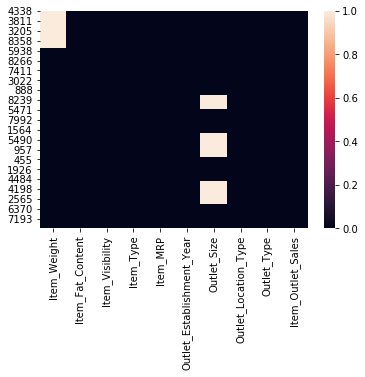

In [4]:
# To find and see the Missing Values:
sns.heatmap(df.isnull())
df.isnull().sum()

In [5]:
# Drop the missing values:
df.dropna(axis=0, inplace=True)
df.shape

(4650, 10)

In [6]:
L_con=['Item_Weight', 'Item_Visibility', 'Item_MRP' ]
L_cat=['Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type']
L_nom=['Item_Fat_Content', 'Item_Type', 'Outlet_Type']

______________________________________________________________________
variable name:  Item_Visibility 

Statistical description: 
count    4650.000000
mean        0.060700
std         0.044607
min         0.000000
25%         0.025968
50%         0.049655
75%         0.088736
max         0.188323
Name: Item_Visibility, dtype: float64

Skewness =  0.7715619657345737
Kurtosis =  -0.16001097122400232


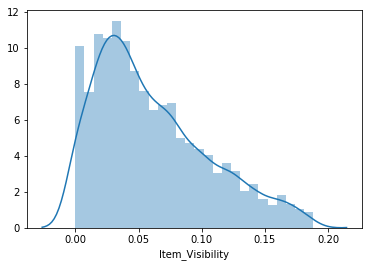

______________________________________________________________________
variable name:  Item_MRP 

Statistical description: 
count    4650.000000
mean      141.716328
std        62.420534
min        31.490000
25%        94.409400
50%       142.979900
75%       186.614150
max       266.888400
Name: Item_MRP, dtype: float64

Skewness =  0.1309680122051078
Kurtosis =  -0.8945425303815329


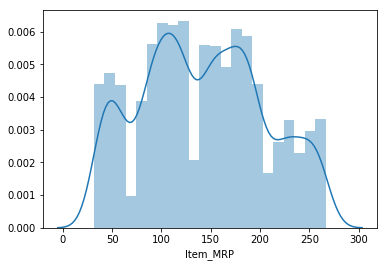

______________________________________________________________________
variable name:  Item_Outlet_Sales 

Statistical description: 
count     4650.000000
mean      2272.037489
std       1497.964740
min         69.243200
25%       1125.202000
50%       1939.808300
75%       3111.616300
max      10256.649000
Name: Item_Outlet_Sales, dtype: float64

Skewness =  1.0056043567501671
Kurtosis =  0.8673990003163987


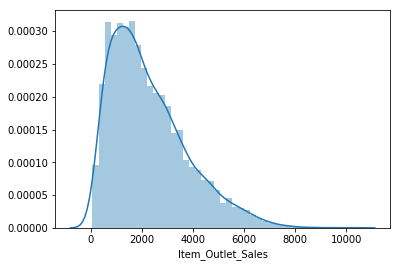

In [7]:
# Univariate analysis of Continuous varaibles: Statistical description (mean, std, skewness, Kurtosis) & Distribution plots
# of each continuous variable 
L=[]
for i in ['Item_Visibility', 'Item_MRP','Item_Outlet_Sales']:
    print('_'*70 )
    print('variable name: ', i, '\n')
    
    print('Statistical description: \n', df[i].describe(), '\n', sep='')
    
    if df[i].min()==0: 
        L.append(i)
    
    print("Skewness = ", df[i].skew())
    print("Kurtosis = ", df[i].kurt())
    
    sns.distplot(df[i], kde=True)
    plt.show()

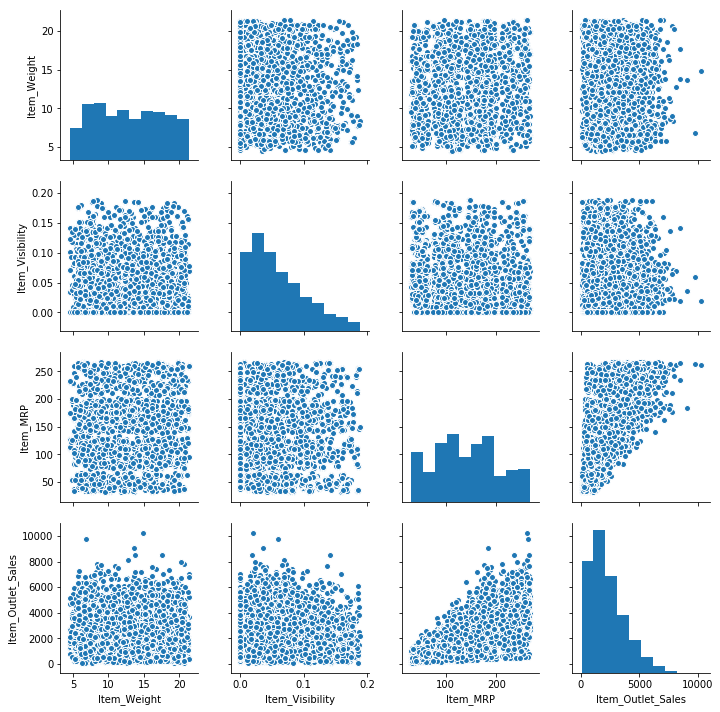

In [8]:
# Multi-variable analysis of Contineous Features: Pairplot of all continuous variables
sns.pairplot(pd.concat((df[L_con], df['Item_Outlet_Sales']), axis=1 ))

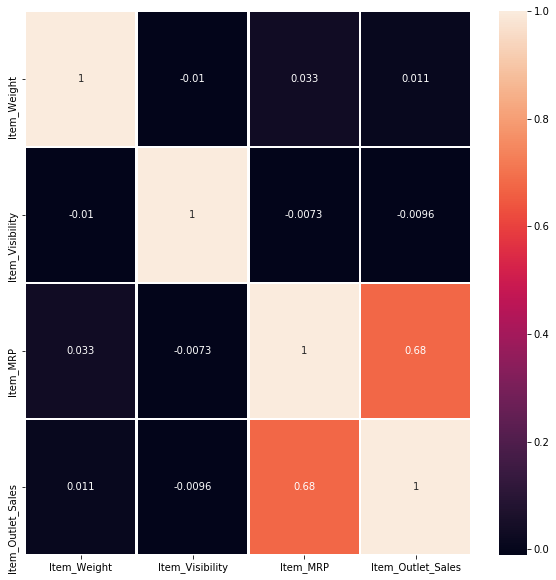

In [9]:
# Multivariable study: heatmap of correlation between continuous features
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(pd.concat((df[L_con] ,df['Item_Outlet_Sales'] ), axis=1).corr(), annot=True, linewidths=1.5, ax=ax )

______________________________________________________________________
variable name:  Item_Weight


<Figure size 432x432 with 0 Axes>

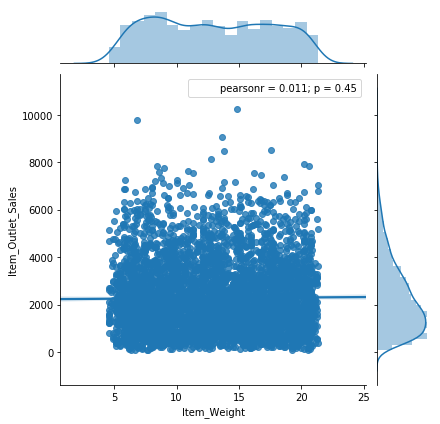

______________________________________________________________________
variable name:  Item_Visibility


<Figure size 432x432 with 0 Axes>

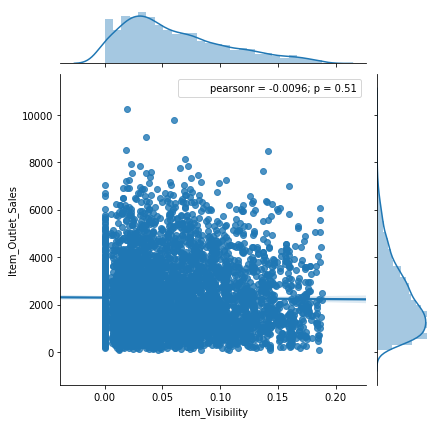

______________________________________________________________________
variable name:  Item_MRP


<Figure size 432x432 with 0 Axes>

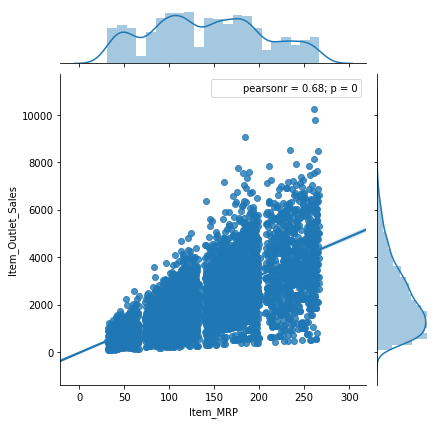

In [10]:
# Multivariable analysis of Contineous Features: Target variable Vs. feature 
for i in L_con:
    print('_'*70 )
    print('variable name: ', i)
    
    plt.figure(figsize=(6, 6))
    sns.jointplot( x=i, y='Item_Outlet_Sales', data=pd.concat((df[L_con], df['Item_Outlet_Sales']), axis=1), kind='reg')

    plt.show()

______________________________________________________________________
variable name:  Item_Visibility


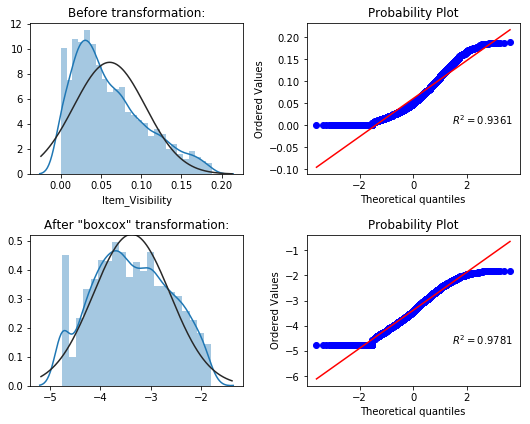

______________________________________________________________________
variable name:  Item_MRP


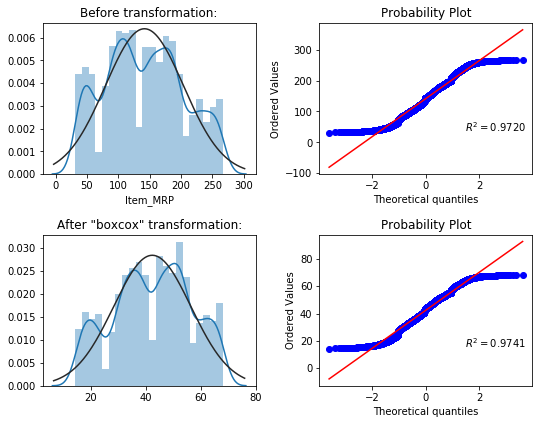

______________________________________________________________________
variable name:  Item_Outlet_Sales


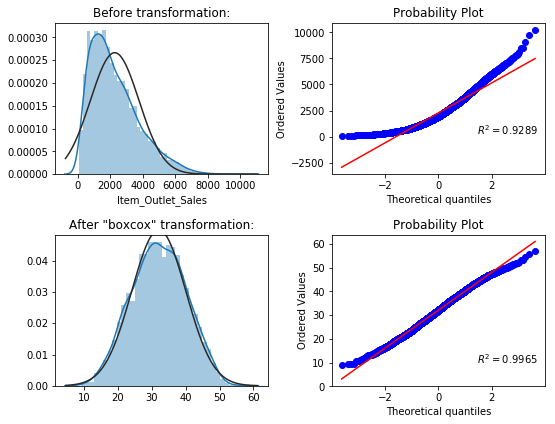

In [11]:
# To test the Statistical Assumptions on Continuous variables: We Check if our data meets the assumptions reuired by most mutivariate techniques _________
for i in ['Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']:
    print('_'*70 )
    print('variable name: ', i)
    
    fig = plt.figure(figsize=(8, 6))
    
    ax1 = fig.add_subplot(221)
    ax1=sns.distplot(df[i], fit=stats.norm)
    ax1.set_title('Before transformation:')
    
    ax2 = fig.add_subplot(222)
    res=stats.probplot(df[i], plot=ax2, rvalue=True)
    
    b=0
    if i in L:
        b=0.1
    
    ax3 = fig.add_subplot(223)
    ax3=sns.distplot(stats.boxcox(b+df[i])[0], fit=stats.norm)
    ax3.set_title('After "boxcox" transformation:')
    
    ax4 = fig.add_subplot(224)
    res=stats.probplot(stats.boxcox(b+df[i])[0], dist=stats.norm, plot=ax4, rvalue=True)
    
    fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.4, wspace=0.3)
    plt.show()

______________________________________________________________________
variable name:  Outlet_Establishment_Year


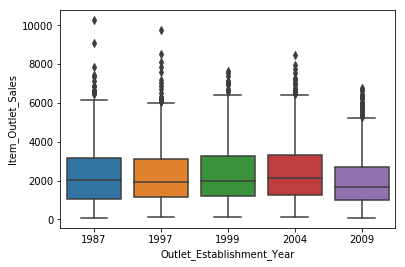

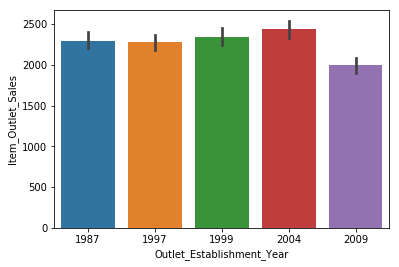

______________________________________________________________________
variable name:  Outlet_Size


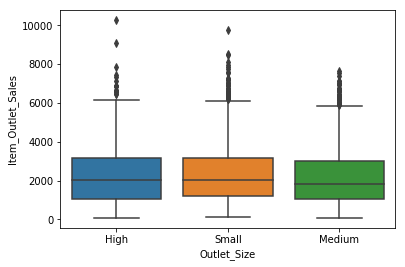

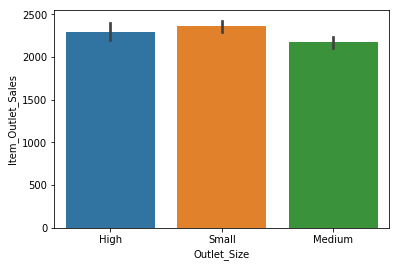

______________________________________________________________________
variable name:  Outlet_Location_Type


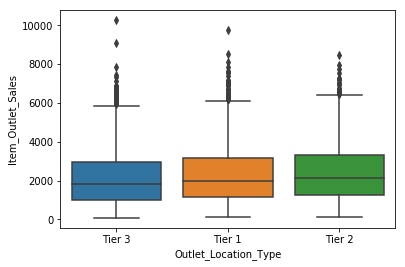

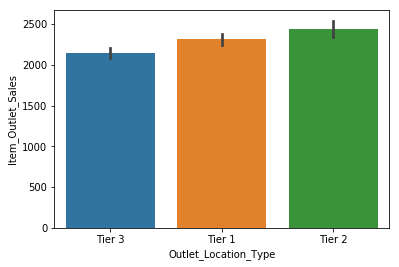

______________________________________________________________________
variable name:  Item_Fat_Content


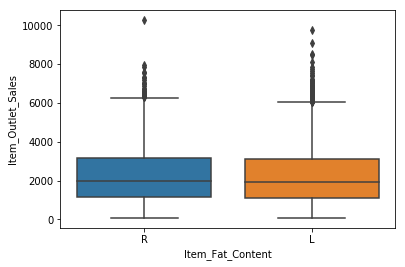

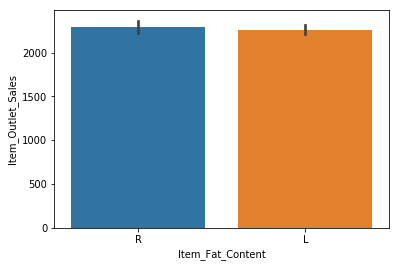

______________________________________________________________________
variable name:  Item_Type


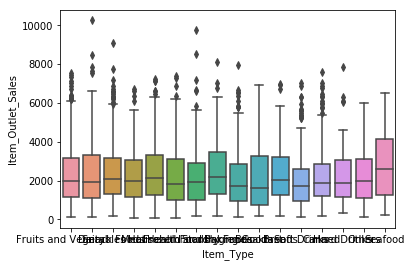

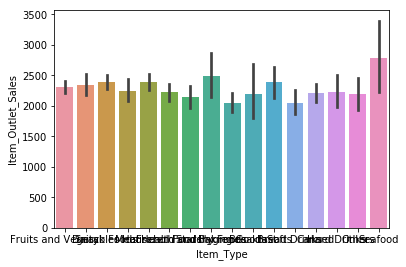

______________________________________________________________________
variable name:  Outlet_Type


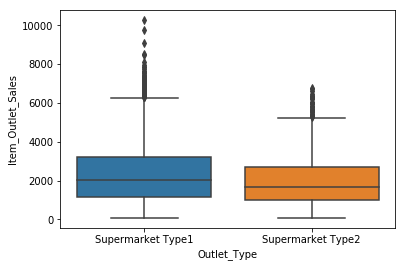

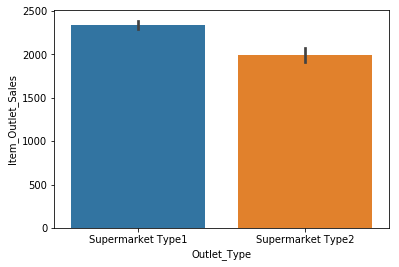

In [12]:
# Multivariable analysis of Categorical features: Boxplot & Barplot of Target Value for different Categories
for i in ['Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Item_Fat_Content', 'Item_Type', 'Outlet_Type']:
    print('_'*70 )
    print('variable name: ', i)
    
    sns.boxplot( x=i, y='Item_Outlet_Sales', data=df)
    plt.show()
    
    sns.barplot( x=i, y='Item_Outlet_Sales', data=df)
    plt.show()

______________________________________________________________________
variable name:  Outlet_Establishment_Year


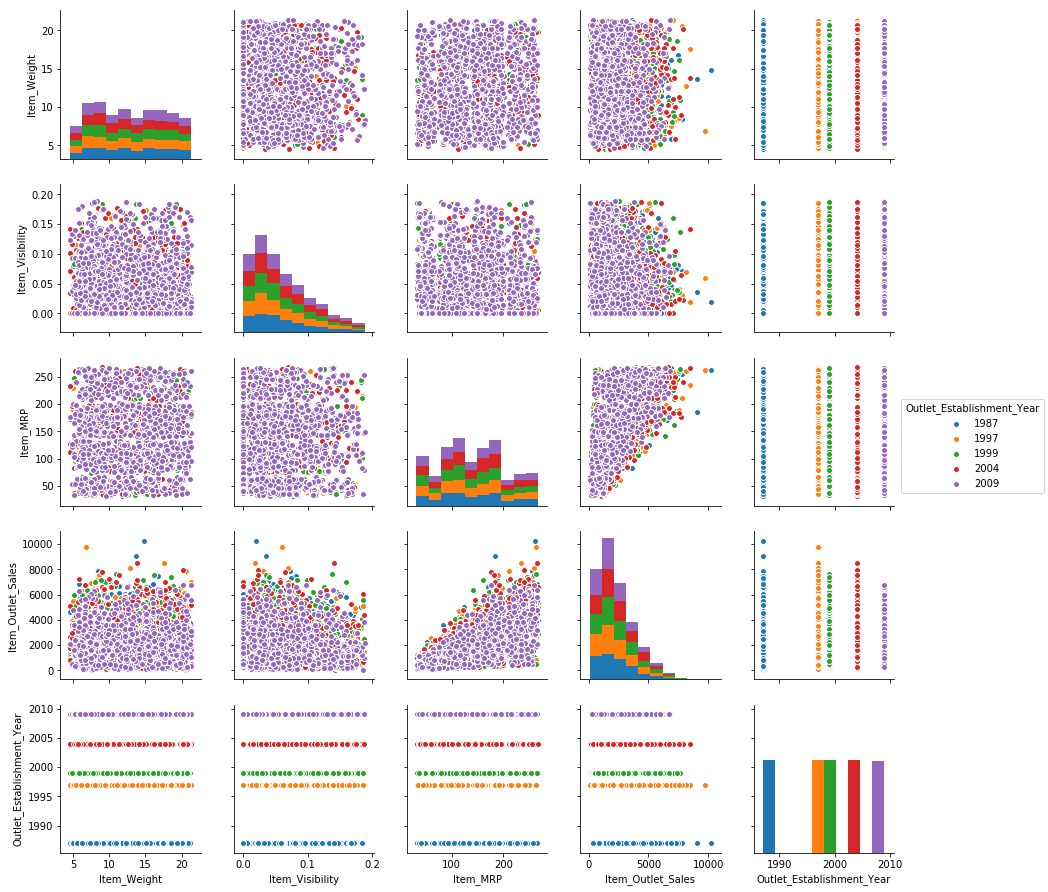

______________________________________________________________________
variable name:  Outlet_Size


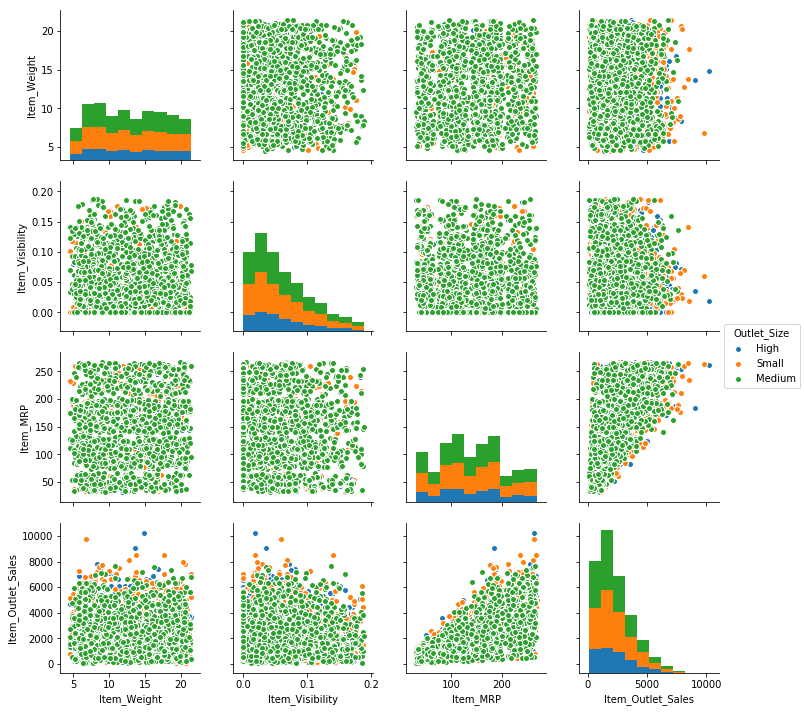

______________________________________________________________________
variable name:  Outlet_Location_Type


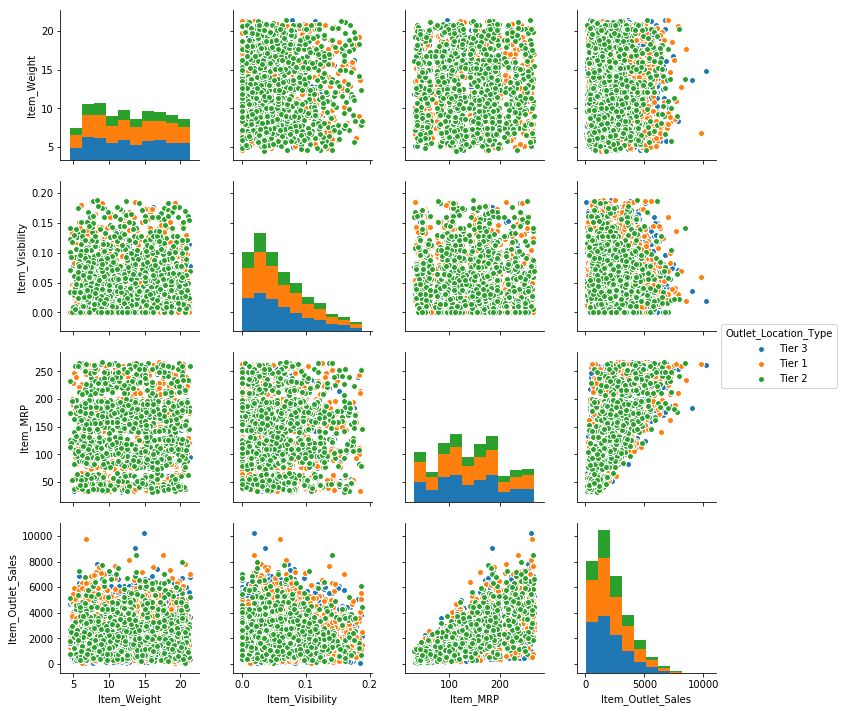

______________________________________________________________________
variable name:  Item_Fat_Content


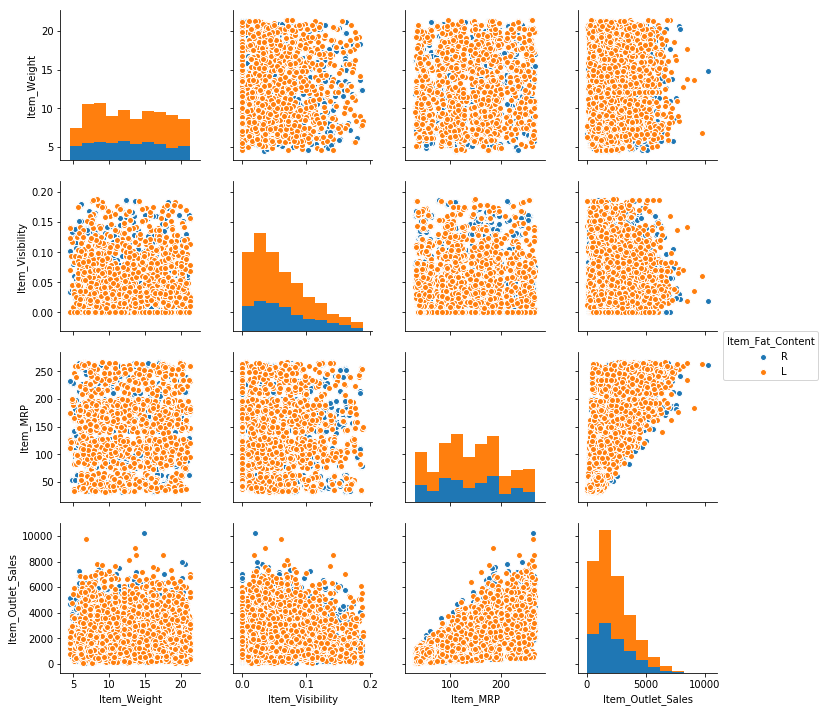

______________________________________________________________________
variable name:  Item_Type


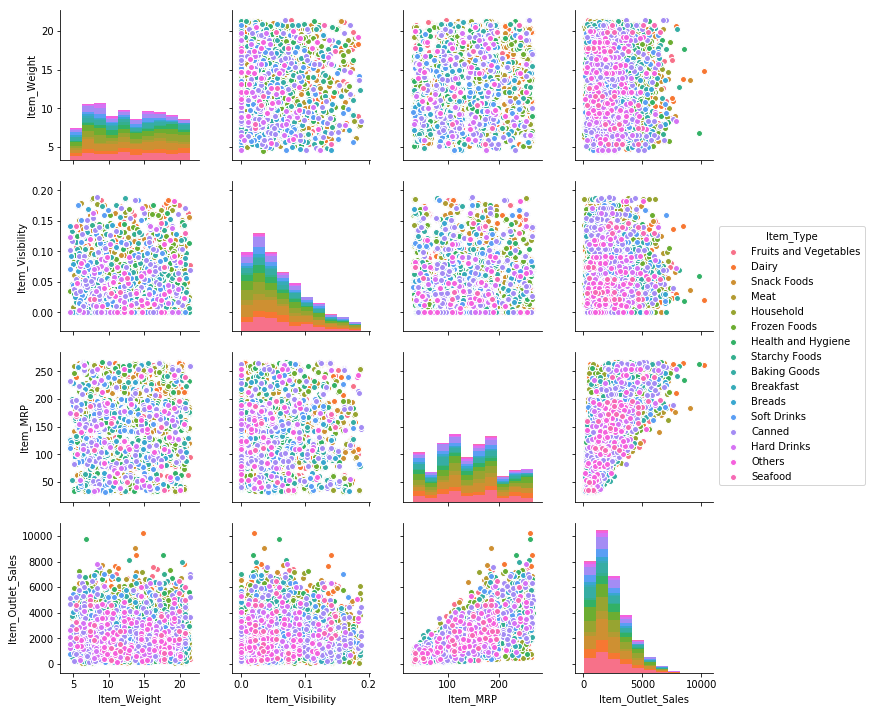

______________________________________________________________________
variable name:  Outlet_Type


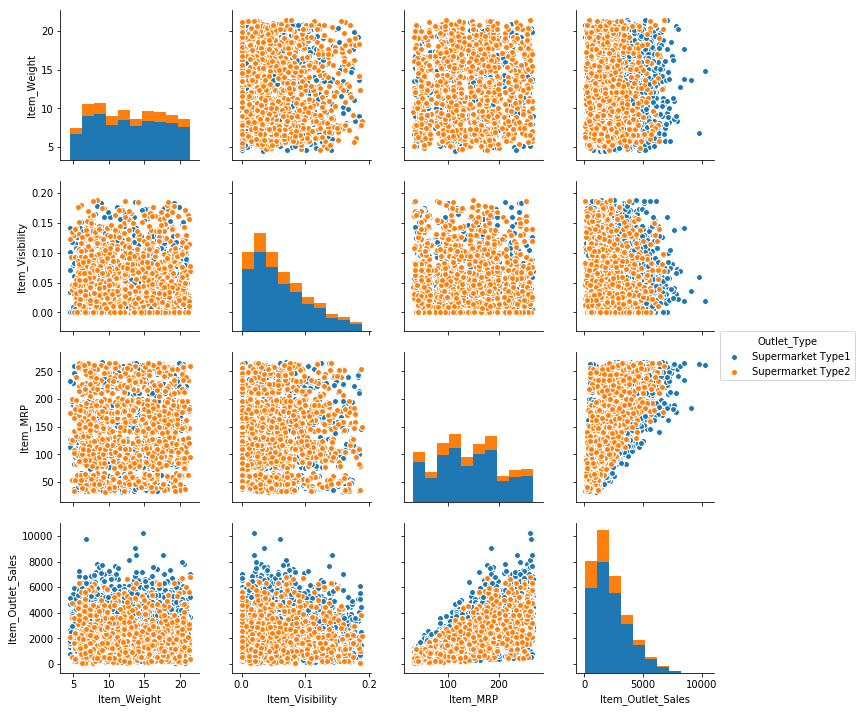

In [15]:
# Multivariable analysis of categorical features: Pairplot of Continuous variables
# for different categories of Categorical variables

for i in ['Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Item_Fat_Content', 'Item_Type', 'Outlet_Type']:
    print('_'*70 )
    print('variable name: ', i)

    sns.pairplot(pd.concat((df[L_con], df['Item_Outlet_Sales'], df[i]), axis=1 ), hue=i)
    plt.show()